<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a  href="#0-Describe-the-goals-of-the-research-and-import-data" data-toc-modified-id="0-Describe-the-goals-of-the-research-and-import-data-1">0 Describe the goals of the research and import data</a></span></li><li><span><a href="#1-Preprocessing" data-toc-modified-id="1-Preprocessing-2">1 Preprocessing</a></span></li><li><span><a href="#1-Conclusion" data-toc-modified-id="1-Conclusion-3">1 Conclusion</a></span></li><li><span><a href="#2-Carry-out-exploratory-data-analysis" data-toc-modified-id="2-Carry-out-exploratory-data-analysis-4">2 Carry out exploratory data analysis</a></span></li><li><span><a href="#2.1---Study-conversion-at-different-funnel-stages" data-toc-modified-id="2.1---Study-conversion-at-different-funnel-stages-5">2.1 - Study conversion at different funnel stages</a></span></li><li><span><a href="#2.1-Conclusion" data-toc-modified-id="2.1-Conclusion-6">2.1 Conclusion</a></span></li><li><span><a href="#2.2-Is-the-number-of-events-per-user-distributed-equally-in-the-samples?" data-toc-modified-id="2.2-Is-the-number-of-events-per-user-distributed-equally-in-the-samples?-7">2.2 Is the number of events per user distributed equally in the samples?</a></span></li><li><span><a href="#2.2-conclusion" data-toc-modified-id="2.2-conclusion-8">2.2 conclusion</a></span></li><li><span><a href="#2.3---Are-there-users-who-enter-both-samples?" data-toc-modified-id="2.3---Are-there-users-who-enter-both-samples?-9">2.3 - Are there users who enter both samples?</a></span></li><li><span><a href="#2.3-Conclusion" data-toc-modified-id="2.3-Conclusion-10">2.3 Conclusion</a></span></li><li><span><a href="#2.4---How-is-the-number-of-events-distributed-by-days?" data-toc-modified-id="2.4---How-is-the-number-of-events-distributed-by-days?-11">2.4 - How is the number of events distributed by days?</a></span></li><li><span><a href="#2.4-Conclusion" data-toc-modified-id="2.4-Conclusion-12">2.4 Conclusion</a></span></li><li><span><a href="#2.5---Think-of-the-possible-details-in-the-data-that-you-have-to-take-into-account-before-starting-the-A/B-test?" data-toc-modified-id="2.5---Think-of-the-possible-details-in-the-data-that-you-have-to-take-into-account-before-starting-the-A/B-test?-13">2.5 - Think of the possible details in the data that you have to take into account before starting the A/B test?</a></span></li><li><span><a href="#2.5-Conclusion" data-toc-modified-id="2.5-Conclusion-14">2.5 Conclusion</a></span></li><li><span><a href="#2---Conclusion" data-toc-modified-id="2---Conclusion-15">2 - Conclusion</a></span></li><li><span><a href="#3----Evaluate-the-A/B-test-results" data-toc-modified-id="3----Evaluate-the-A/B-test-results-16">3  - Evaluate the A/B test results</a></span></li><li><span><a href="#3.1---What-can-you-tell-about-the-A/B-test-results?" data-toc-modified-id="3.1---What-can-you-tell-about-the-A/B-test-results?-17">3.1 - What can you tell about the A/B test results?</a></span></li><li><span><a href="#3.1-Conclusion" data-toc-modified-id="3.1-Conclusion-18">3.1 Conclusion</a></span></li><li><span><a href="#3.2---Use-the-z-criterion-to-check-the-statistical-difference-between-the-proportions" data-toc-modified-id="3.2---Use-the-z-criterion-to-check-the-statistical-difference-between-the-proportions-19">3.2 - Use the z-criterion to check the statistical difference between the proportions</a></span></li><li><span><a href="#3---Conclusion" data-toc-modified-id="3---Conclusion-20">3 - Conclusion</a></span></li><li><span><a href="#4-General-conclusion" data-toc-modified-id="4-General-conclusion-21">4 General conclusion</a></span></li><li><span><a href="#5-Recommendation" data-toc-modified-id="5-Recommendation-22">5 Recommendation</a></span></li></ul></div>

---

##  0 Describe the goals of the research and import data

In [143]:
# !pip install plotly.express
!pip install seaborn -U
# !pip install plotly.express -U
!pip install plotly -U
import plotly.express as px
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt 
from functools import reduce
import math
import warnings
import seaborn as sns
import datetime as dt
warnings.filterwarnings("ignore")
pd.set_option('max_colwidth', 400)

Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: seaborn in /home/jovyan/.local/lib/python3.7/site-packages (0.11.1)
Defaulting to user installation because normal site-packages is not writeable
Requirement already up-to-date: plotly in /home/jovyan/.local/lib/python3.7/site-packages (5.0.0)


In [144]:
try:
    data1=pd.read_csv(r'C:\Users\49157\Desktop\p100ab\revenue.csv')
    data2=pd.read_csv(r'C:\Users\49157\Desktop\p100ab\group.csv')
    data3=pd.read_csv(r'C:\Users\49157\Desktop\p100ab\2sample.csv')
except:
    data1=pd.read_csv(r'/datasets/final_ab_events_upd_us.csv')
    data3=pd.read_csv(r'/datasets/final_ab_new_users_upd_us.csv')
    data2=pd.read_csv(r'/datasets/final_ab_participants_upd_us.csv')
    data4=pd.read_csv(r'/datasets/ab_project_marketing_events_us.csv')

## 1 Preprocessing
- Does it need converting types?
- Are there any missing or duplicate values? If so, what's their nature?

In [145]:
def showdata(df):
    display(df.head(10))
    display(df.info())
    display(df.describe())
    display(df.isnull().sum() * 100 / len(df))
    display(df.duplicated().sum() * 100 / len(df))
    display(df.describe())

In [146]:
showdata(data1)

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
5,831887FE7F2D6CBA,2020-12-07 06:50:29,purchase,4.99
6,6B2F726BFD5F8220,2020-12-07 11:27:42,purchase,4.99
7,BEB37715AACF53B0,2020-12-07 04:26:15,purchase,4.99
8,B5FA27F582227197,2020-12-07 01:46:37,purchase,4.99
9,A92195E3CFB83DBD,2020-12-07 00:32:07,purchase,4.99


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 423761 entries, 0 to 423760
Data columns (total 4 columns):
user_id       423761 non-null object
event_dt      423761 non-null object
event_name    423761 non-null object
details       60314 non-null float64
dtypes: float64(1), object(3)
memory usage: 12.9+ MB


None

,details
count,60314.000000
mean,23.881219
std,72.228884
min,4.990000
25%,4.990000
50%,4.990000
75%,9.990000
max,499.990000


user_id        0.000000
event_dt       0.000000
event_name     0.000000
details       85.766977
dtype: float64

0.0

,details
count,60314.000000
mean,23.881219
std,72.228884
min,4.990000
25%,4.990000
50%,4.990000
75%,9.990000
max,499.990000


In [147]:
data1["user_id"].nunique()

58703

In [148]:
data2["user_id"].nunique()

13638

In [149]:
showdata(data2)

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
2,DABC14FDDFADD29E,A,recommender_system_test
3,04988C5DF189632E,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test
5,7473E0943673C09E,A,recommender_system_test
6,C46FE336D240A054,A,recommender_system_test
7,92CB588012C10D3D,A,recommender_system_test
8,B3A2485649E4A012,A,recommender_system_test
9,66FC298441D50783,A,recommender_system_test


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14525 entries, 0 to 14524
Data columns (total 3 columns):
user_id    14525 non-null object
group      14525 non-null object
ab_test    14525 non-null object
dtypes: object(3)
memory usage: 340.6+ KB


None

,user_id,group,ab_test
count,14525,14525,14525
unique,13638,2,2
top,57442DD4178AFE27,A,interface_eu_test
freq,2,8214,10850


user_id    0.0
group      0.0
ab_test    0.0
dtype: float64

0.0

,user_id,group,ab_test
count,14525,14525,14525
unique,13638,2,2
top,57442DD4178AFE27,A,interface_eu_test
freq,2,8214,10850


In [150]:
test=data2.groupby(['user_id'])['ab_test'].nunique().reset_index().query('ab_test==1')

In [151]:
data2=data2[data2["user_id"].isin(test["user_id"])]

In [152]:
data2

,user_id,group,ab_test
0,D1ABA3E2887B6A73,A,recommender_system_test
1,A7A3664BD6242119,A,recommender_system_test
4,4FF2998A348C484F,A,recommender_system_test
5,7473E0943673C09E,A,recommender_system_test
6,C46FE336D240A054,A,recommender_system_test
...,...,...,...
14520,1D302F8688B91781,B,interface_eu_test
14521,3DE51B726983B657,A,interface_eu_test
14522,F501F79D332BE86C,A,interface_eu_test
14523,63FBE257B05F2245,A,interface_eu_test


In [153]:
data2=data2[data2["user_id"].isin(test["user_id"])]

In [154]:
data2=data2.query('ab_test == "interface_eu_test"')

In [155]:
data2

,user_id,group,ab_test
3675,D4E530F6595A05A3,A,interface_eu_test
3676,6BCB0F33D3BAB8C2,A,interface_eu_test
3678,2D2E7AA539CF348F,B,interface_eu_test
3679,4BA448BCE1343C6F,A,interface_eu_test
3680,76B6CDF2A8B1DBFC,B,interface_eu_test
...,...,...,...
14520,1D302F8688B91781,B,interface_eu_test
14521,3DE51B726983B657,A,interface_eu_test
14522,F501F79D332BE86C,A,interface_eu_test
14523,63FBE257B05F2245,A,interface_eu_test


In [156]:
test=data2.groupby(['user_id'])['group'].nunique().reset_index().query('group==1')

In [157]:
showdata(data3)

,user_id,first_date,region,device
0,D72A72121175D8BE,2020-12-07,EU,PC
1,F1C668619DFE6E65,2020-12-07,N.America,Android
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC
3,50734A22C0C63768,2020-12-07,EU,iPhone
4,E1BDDCE0DAFA2679,2020-12-07,N.America,iPhone
5,137119F5A9E69421,2020-12-07,N.America,iPhone
6,62F0C741CC42D0CC,2020-12-07,APAC,iPhone
7,8942E64218C9A1ED,2020-12-07,EU,PC
8,499AFACF904BBAE3,2020-12-07,N.America,iPhone
9,FFCEA1179C253104,2020-12-07,EU,Android


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58703 entries, 0 to 58702
Data columns (total 4 columns):
user_id       58703 non-null object
first_date    58703 non-null object
region        58703 non-null object
device        58703 non-null object
dtypes: object(4)
memory usage: 1.8+ MB


None

,user_id,first_date,region,device
count,58703,58703,58703,58703
unique,58703,17,4,4
top,CACAF6059D646678,2020-12-21,EU,Android
freq,1,6077,43396,26159


user_id       0.0
first_date    0.0
region        0.0
device        0.0
dtype: float64

0.0

,user_id,first_date,region,device
count,58703,58703,58703,58703
unique,58703,17,4,4
top,CACAF6059D646678,2020-12-21,EU,Android
freq,1,6077,43396,26159


In [158]:
data3["first_date"].unique()

array(['2020-12-07', '2020-12-14', '2020-12-21', '2020-12-08',
       '2020-12-15', '2020-12-22', '2020-12-09', '2020-12-16',
       '2020-12-23', '2020-12-10', '2020-12-17', '2020-12-11',
       '2020-12-18', '2020-12-12', '2020-12-19', '2020-12-13',
       '2020-12-20'], dtype=object)

In [159]:
data3=data3.query('region == "EU"')

In [160]:
data3["user_id"].nunique()

43396

In [161]:
data3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43396 entries, 0 to 58702
Data columns (total 4 columns):
user_id       43396 non-null object
first_date    43396 non-null object
region        43396 non-null object
device        43396 non-null object
dtypes: object(4)
memory usage: 1.7+ MB


In [162]:
data2

,user_id,group,ab_test
3675,D4E530F6595A05A3,A,interface_eu_test
3676,6BCB0F33D3BAB8C2,A,interface_eu_test
3678,2D2E7AA539CF348F,B,interface_eu_test
3679,4BA448BCE1343C6F,A,interface_eu_test
3680,76B6CDF2A8B1DBFC,B,interface_eu_test
...,...,...,...
14520,1D302F8688B91781,B,interface_eu_test
14521,3DE51B726983B657,A,interface_eu_test
14522,F501F79D332BE86C,A,interface_eu_test
14523,63FBE257B05F2245,A,interface_eu_test


In [163]:
data2["user_id"].nunique()

9963

In [164]:
data2=data2.query('ab_test == "interface_eu_test"')

In [165]:
data2

,user_id,group,ab_test
3675,D4E530F6595A05A3,A,interface_eu_test
3676,6BCB0F33D3BAB8C2,A,interface_eu_test
3678,2D2E7AA539CF348F,B,interface_eu_test
3679,4BA448BCE1343C6F,A,interface_eu_test
3680,76B6CDF2A8B1DBFC,B,interface_eu_test
...,...,...,...
14520,1D302F8688B91781,B,interface_eu_test
14521,3DE51B726983B657,A,interface_eu_test
14522,F501F79D332BE86C,A,interface_eu_test
14523,63FBE257B05F2245,A,interface_eu_test


In [166]:
udata=data3.merge(data2, on='user_id',how = "left")

In [167]:
udata

,user_id,first_date,region,device,group,ab_test
0,D72A72121175D8BE,2020-12-07,EU,PC,NaN,NaN
1,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test
2,50734A22C0C63768,2020-12-07,EU,iPhone,B,interface_eu_test
3,8942E64218C9A1ED,2020-12-07,EU,PC,NaN,NaN
4,FFCEA1179C253104,2020-12-07,EU,Android,NaN,NaN
...,...,...,...,...,...,...
43391,1DB53B933257165D,2020-12-20,EU,Android,NaN,NaN
43392,538643EB4527ED03,2020-12-20,EU,Mac,NaN,NaN
43393,7ADEE837D5D8CBBD,2020-12-20,EU,PC,NaN,NaN
43394,1C7D23927835213F,2020-12-20,EU,iPhone,B,interface_eu_test


In [168]:

data1.rename(columns={'id':'user_id'}, inplace=True)

In [169]:
data1

,user_id,event_dt,event_name,details
0,E1BDDCE0DAFA2679,2020-12-07 20:22:03,purchase,99.99
1,7B6452F081F49504,2020-12-07 09:22:53,purchase,9.99
2,9CD9F34546DF254C,2020-12-07 12:59:29,purchase,4.99
3,96F27A054B191457,2020-12-07 04:02:40,purchase,4.99
4,1FD7660FDF94CA1F,2020-12-07 10:15:09,purchase,4.99
...,...,...,...,...
423756,245E85F65C358E08,2020-12-30 19:35:55,login,NaN
423757,9385A108F5A0A7A7,2020-12-30 10:54:15,login,NaN
423758,DB650B7559AC6EAC,2020-12-30 10:59:09,login,NaN
423759,F80C9BDDEA02E53C,2020-12-30 09:53:39,login,NaN


In [170]:
data1=data1[data1["user_id"].isin(udata["user_id"])]

In [171]:
udata=udata.merge(data1, on='user_id',how = "right")

In [172]:
udata=udata.query('ab_test == "interface_eu_test"')

In [173]:
showdata(udata)

,user_id,first_date,region,device,group,ab_test,event_dt,event_name,details
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-07 09:05:47,product_cart,NaN
3,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-10 04:13:53,product_cart,NaN
4,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-12 17:54:57,product_cart,NaN
5,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-07 09:05:46,product_page,NaN
6,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-10 04:13:53,product_page,NaN
7,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-12 17:54:57,product_page,NaN
8,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-07 09:05:46,login,NaN
9,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-10 04:13:53,login,NaN
10,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-12 17:54:57,login,NaN
11,50734A22C0C63768,2020-12-07,EU,iPhone,B,interface_eu_test,2020-12-07 13:24:03,product_cart,NaN


<class 'pandas.core.frame.DataFrame'>
Int64Index: 73214 entries, 2 to 314774
Data columns (total 9 columns):
user_id       73214 non-null object
first_date    73214 non-null object
region        73214 non-null object
device        73214 non-null object
group         73214 non-null object
ab_test       73214 non-null object
event_dt      73214 non-null object
event_name    73214 non-null object
details       10824 non-null float64
dtypes: float64(1), object(8)
memory usage: 5.6+ MB


None

,details
count,10824.000000
mean,23.706279
std,72.116303
min,4.990000
25%,4.990000
50%,4.990000
75%,9.990000
max,499.990000


user_id        0.000000
first_date     0.000000
region         0.000000
device         0.000000
group          0.000000
ab_test        0.000000
event_dt       0.000000
event_name     0.000000
details       85.215942
dtype: float64

0.0

,details
count,10824.000000
mean,23.706279
std,72.116303
min,4.990000
25%,4.990000
50%,4.990000
75%,9.990000
max,499.990000


In [174]:
udata["user_id"].nunique()

9963

## 1 Conclusion

I noticed a mistake in the description and merged the data to have a clean data with only EU and interface_eu_test includs.

## 2 Carry out exploratory data analysis

## 2.1 - Study conversion at different funnel stages

In [175]:
udata.head()

,user_id,first_date,region,device,group,ab_test,event_dt,event_name,details
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-07 09:05:47,product_cart,NaN
3,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-10 04:13:53,product_cart,NaN
4,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-12 17:54:57,product_cart,NaN
5,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-07 09:05:46,product_page,NaN
6,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-10 04:13:53,product_page,NaN


In [176]:
udata.pivot_table(values='user_id', index='event_name', aggfunc=pd.Series.count).sort_values(by="user_id", ascending=False)

,user_id
event_name,
login,31264
product_page,20671
purchase,10824
product_cart,10455


In [177]:
udata["event_name"].unique()

array(['product_cart', 'product_page', 'login', 'purchase'], dtype=object)

In [178]:
def getid(row):
    
    if row["event_name"] == "login":
        x=0
    elif row["event_name"] == "product_page":
        x=1
    elif row["event_name"] == "product_cart":
        x=2
    elif row["event_name"] == "purchase":
        x=3
   
    
    return x
udata['experiment_id'] = udata.apply(getid,axis=1)

In [179]:
udata.head()

,user_id,first_date,region,device,group,ab_test,event_dt,event_name,details,experiment_id
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-07 09:05:47,product_cart,NaN,2
3,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-10 04:13:53,product_cart,NaN,2
4,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-12 17:54:57,product_cart,NaN,2
5,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-07 09:05:46,product_page,NaN,1
6,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-10 04:13:53,product_page,NaN,1


In [180]:
udata=udata.rename(columns={"event_name": "eventname", "user_id": "id", "event_dt": "timestamp"})

In [181]:
udata.head()

,id,first_date,region,device,group,ab_test,timestamp,eventname,details,experiment_id
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-07 09:05:47,product_cart,NaN,2
3,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-10 04:13:53,product_cart,NaN,2
4,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-12 17:54:57,product_cart,NaN,2
5,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-07 09:05:46,product_page,NaN,1
6,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-10 04:13:53,product_page,NaN,1


In [182]:
udata['timestamp'] = pd.to_datetime(udata['timestamp'])

In [183]:
udata.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 73214 entries, 2 to 314774
Data columns (total 10 columns):
id               73214 non-null object
first_date       73214 non-null object
region           73214 non-null object
device           73214 non-null object
group            73214 non-null object
ab_test          73214 non-null object
timestamp        73214 non-null datetime64[ns]
eventname        73214 non-null object
details          10824 non-null float64
experiment_id    73214 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(7)
memory usage: 6.1+ MB


In [184]:
print("There are {} different events on the logs and {} total events ".format(len(udata["eventname"].unique() ), udata["eventname"].count())
     )

There are 4 different events on the logs and 73214 total events 


In [185]:
print("There are {} different users on the logs".format(udata["id"].nunique()))

There are 9963 different users on the logs


In [186]:
def plotdist(data):
    plt.figure(figsize=(15,10))
    plt.title("Distribution of time")
    plt.xlabel("time")
    plt.ylabel("count")
    plt.xticks(fontsize = 10)
    sns.histplot(data=data, x="timestamp")
    plt.show()

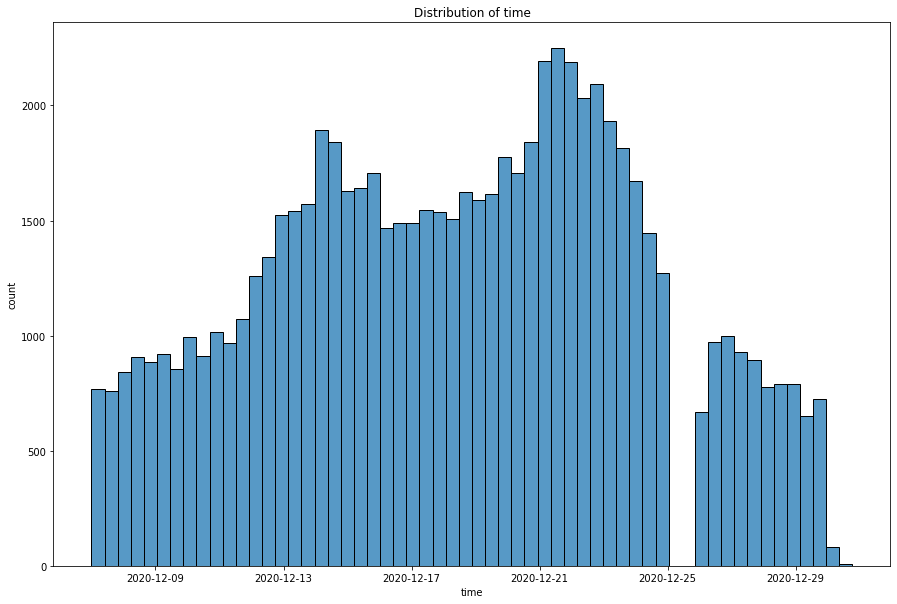

In [187]:
plotdist(udata)

In [188]:
pivot = udata.pivot_table(index='eventname', values='id', columns='experiment_id', aggfunc=lambda x: x.nunique()).reset_index()
pivot

experiment_id,eventname,0,1,2,3
0,login,9962.0,NaN,NaN,NaN
1,product_cart,NaN,NaN,3315.0,NaN
2,product_page,NaN,6620.0,NaN,NaN
3,purchase,NaN,NaN,NaN,3435.0


In [189]:
udata.pivot_table(values='id', index='eventname', aggfunc=pd.Series.count).sort_values(by="id", ascending=False)

,id
eventname,
login,31264
product_page,20671
purchase,10824
product_cart,10455


## 2.1 Conclusion 

We notice all users that put something in the cart, purchased it. 

We can see the user are more active when chrismas come closer, then a break happen and after chrismas there are much less active user

## 2.2 Is the number of events per user distributed equally in the samples?

In [190]:
udata.pivot_table(values='id', index='group', columns="eventname", aggfunc=pd.Series.count)

eventname,login,product_cart,product_page,purchase
group,,,,
A,15771,5189,10544,5631
B,15493,5266,10127,5193


## 2.2 conclusion

The groups are not equally distributed.

## 2.3 - Are there users who enter both samples?

In [191]:
udata.head()

,id,first_date,region,device,group,ab_test,timestamp,eventname,details,experiment_id
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-07 09:05:47,product_cart,NaN,2
3,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-10 04:13:53,product_cart,NaN,2
4,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-12 17:54:57,product_cart,NaN,2
5,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-07 09:05:46,product_page,NaN,1
6,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-10 04:13:53,product_page,NaN,1


In [192]:
groupa=udata.query('group == "A"')

In [193]:
bothsampelusers=udata.groupby(['id'])['group'].nunique().reset_index().query('group>1')

In [194]:
bothsampelusers

,id,group


## 2.3 Conclusion 

There are no users in both groups

## 2.4 - How is the number of events distributed by days?

In [195]:
udata

,id,first_date,region,device,group,ab_test,timestamp,eventname,details,experiment_id
2,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-07 09:05:47,product_cart,NaN,2
3,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-10 04:13:53,product_cart,NaN,2
4,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-12 17:54:57,product_cart,NaN,2
5,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-07 09:05:46,product_page,NaN,1
6,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-10 04:13:53,product_page,NaN,1
...,...,...,...,...,...,...,...,...,...,...
314770,1C7D23927835213F,2020-12-20,EU,iPhone,B,interface_eu_test,2020-12-27 03:51:36,product_page,NaN,1
314771,1C7D23927835213F,2020-12-20,EU,iPhone,B,interface_eu_test,2020-12-20 14:14:28,login,NaN,0
314772,1C7D23927835213F,2020-12-20,EU,iPhone,B,interface_eu_test,2020-12-21 04:31:15,login,NaN,0
314773,1C7D23927835213F,2020-12-20,EU,iPhone,B,interface_eu_test,2020-12-23 15:47:23,login,NaN,0


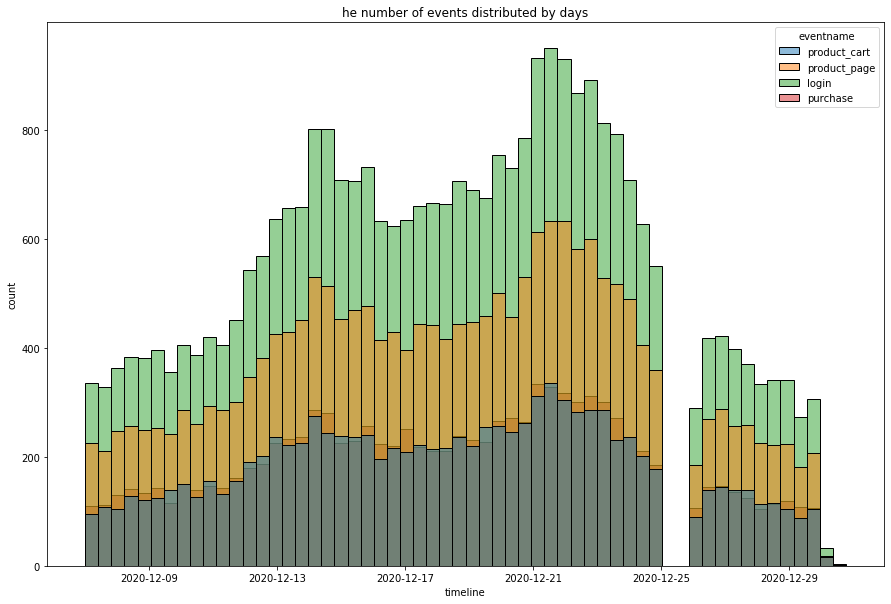

In [196]:
plt.figure(figsize=(15,10))
plt.title("he number of events distributed by days")
plt.xlabel("timeline")
plt.ylabel("count")
plt.xticks(fontsize = 10)
sns.histplot(data=udata, x="timestamp", hue="eventname")
plt.show()

## 2.4 Conclusion

In the graph we can see the distribution of the purchase and product_cart is nearly the same

## 2.5 - Think of the possible details in the data that you have to take into account before starting the A/B test?

## 2.5 Conclusion

i don't removed any optional stages. The data ist ready

## 2 - Conclusion

We notice all users that put something in the cart, purchased it. \
The groups are not equally distributed. \
There are no users in both groups \
the distribution of the purchase and product_cart is nearly the same 

## 3  - Evaluate the A/B test results

## 3.1 - What can you tell about the A/B test results?

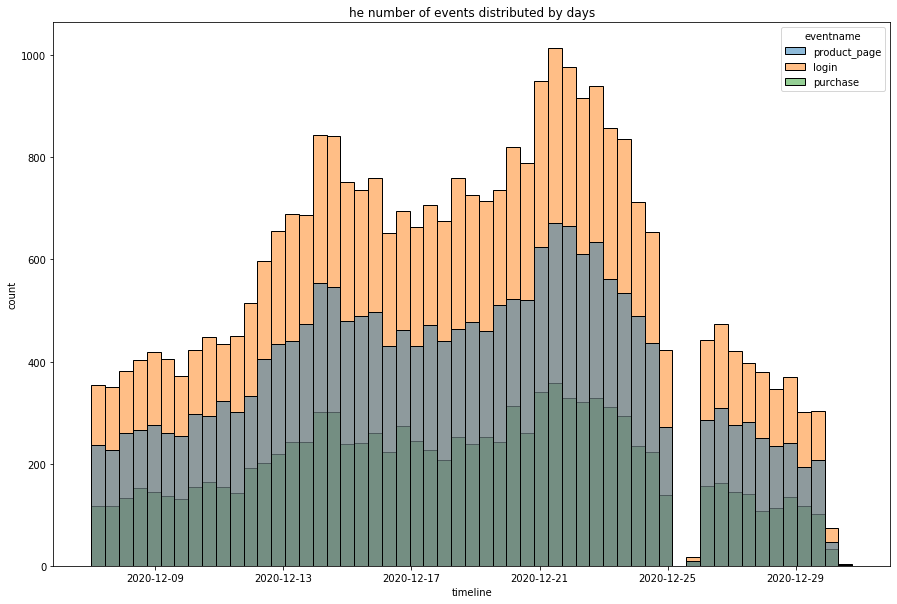

In [128]:
plt.figure(figsize=(15,10))
plt.title("he number of events distributed by days")
plt.xlabel("timeline")
plt.ylabel("count")
plt.xticks(fontsize = 10)
sns.histplot(data=udata, x="timestamp", hue="eventname")
plt.show()

In [129]:
udata['id'].nunique()

9963

In [130]:
udata

,id,first_date,region,device,group,ab_test,timestamp,eventname,details,experiment_id
5,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-07 09:05:46,product_page,NaN,1
6,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-10 04:13:53,product_page,NaN,1
7,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-12 17:54:57,product_page,NaN,1
8,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-07 09:05:46,login,NaN,0
9,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-10 04:13:53,login,NaN,0
...,...,...,...,...,...,...,...,...,...,...
314770,1C7D23927835213F,2020-12-20,EU,iPhone,B,interface_eu_test,2020-12-27 03:51:36,product_page,NaN,1
314771,1C7D23927835213F,2020-12-20,EU,iPhone,B,interface_eu_test,2020-12-20 14:14:28,login,NaN,0
314772,1C7D23927835213F,2020-12-20,EU,iPhone,B,interface_eu_test,2020-12-21 04:31:15,login,NaN,0
314773,1C7D23927835213F,2020-12-20,EU,iPhone,B,interface_eu_test,2020-12-23 15:47:23,login,NaN,0


In [215]:
funnel_shift=udata.groupby(['eventname', "group", "experiment_id"]).agg({"id":"nunique"}).sort_values(by="experiment_id",ascending=True).reset_index()


,eventname,group,experiment_id,id
0,login,A,0,5010
1,login,B,0,4952
2,product_page,A,1,3366
3,product_page,B,1,3254
4,product_cart,A,2,1629
5,product_cart,B,2,1686
6,purchase,A,3,1782
7,purchase,B,3,1653


plt.figure(figsize=(20,10))
pos = -0.15
for index, row in funnel_shift.iterrows():
    plt.text(pos,
             row.id + 20,
             row.id,
             color='black',
             ha="center",
             fontsize=16)

    pos += 0.5
sns.barplot(x="eventname", y="id", hue="group", data=funnel_shift)

plt.ylabel("count")
plt.suptitle("Group Results", fontsize=20) 

plt.show()

## 3.1 Conclusion

Something in the A group went wrong, there are more purchase than product_cart. Mabye there is an express buy method. \
Also threre is a good sign in the distribution between the events, they match the expected results. to match the logic outcome of the filter i kickt out the product_cart because its an optional event.

## 3.2 - Use the z-criterion to check the statistical difference between the proportions

In [61]:
pivot=udata.pivot_table(index='eventname', columns='group',values='id',aggfunc=lambda x: x.nunique()).reset_index()

In [62]:
pivot.rename(columns={'eventname':'event_name'}, inplace=True)

In [63]:
df=udata

In [64]:
df.rename(columns={'eventname':'event_name', 'id':'user_id',}, inplace=True)

In [65]:
df.head()

,user_id,first_date,region,device,group,ab_test,timestamp,event_name,details,experiment_id
5,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-07 09:05:46,product_page,NaN,1
6,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-10 04:13:53,product_page,NaN,1
7,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-12 17:54:57,product_page,NaN,1
8,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-07 09:05:46,login,NaN,0
9,2E1BF1D4C37EA01F,2020-12-07,EU,PC,A,interface_eu_test,2020-12-10 04:13:53,login,NaN,0


In [66]:
import math as mth

In [67]:
pivot

group,event_name,A,B
0,login,5010,4952
1,product_page,3366,3254
2,purchase,1782,1653


Significance level is: 0.05 so we have a accurance of 95% and if we reject the 0 Hypoteses there is a 80% accurency that H1 is true. 

To include the bonferroni i divide the 0.05 with 3 because i make 3 tests.

H0: There is no reason to consider the groups be different

H1: There is a significant difference between the groups

In [68]:
def check_hypothesis(group1,group2,event,alpha=0.01667):
    success1=pivot[pivot.event_name==event][group1].iloc[0]
    success2=pivot[pivot.event_name==event][group2].iloc[0]
    
    trials1=df[df.group==group1]['user_id'].nunique()
    trials2=df[df.group==group2]['user_id'].nunique()
    
    
    # success proportion in the first group:
    p1 = success1/trials1

    # success proportion in the second group:
    p2 = success2/trials2

    # success proportion in the combined dataset:
    p_combined = (success1 + success2) / (trials1 + trials2)

    # the difference between the datasets' proportions
    difference = p1 - p2
    # calculating the statistic in standard deviations of the standard normal distribution
    z_value = difference / mth.sqrt(p_combined * (1 - p_combined) * (1/trials1 + 1/trials2))

    # setting up the standard normal distribution (mean 0, standard deviation 1)
    distr = st.norm(0, 1)
    # calculating the statistic in standard deviations of the standard normal distribution


    p_value = (1 - distr.cdf(abs(z_value))) * 2

    print('p-value: ', p_value)

    if (p_value < alpha):
        print("Rejecting the null hypothesis for", event,"and groups", group1,group2)
    else:
        print("Failed to reject the null hypothesis for",event,"and groups", group1,group2 )
    

In [69]:
check_hypothesis("A","B",'login',alpha=0.01667)

p-value:  0.3201520788748984
Failed to reject the null hypothesis for login and groups A B


In [70]:
check_hypothesis("A","B",'product_page',alpha=0.01667)

p-value:  0.12244077100223438
Failed to reject the null hypothesis for product_page and groups A B


In [71]:
check_hypothesis("A","B",'purchase',alpha=0.01667)

p-value:  0.021997971549269524
Failed to reject the null hypothesis for purchase and groups A B


## 3 - Conclusion

Something in the A group went wrong, there are more purchase than product_cart. Mabye there is an express buy method.
only the first event (product_page) shows there is a significant difference. The other events are not significant.


## 4 General conclusion

We notice all users that put something in the cart, purchased it. \
The groups are not equally distributed. \
There are no users in both groups \
the distribution of the purchase and product_cart is nearly the same 

Something in the A group went wrong, there are more purchase than product_cart. Mabye there is an express buy method. \
Also threre is a good sign in the distribution between the events, they match the expected results. to match the logic outcome of the filter i kickt out the product_cart because its an optional event. Mabye there is an express buy method.
only the first event (product_page) shows there is a significant difference. The other events are not significant.

## 5 Recommendation

As result there is no significant difference between the group so we can't say the new funnel performs better. Special the timing of the test was a mistake. Chrismas manipulate the data, the groups are not equal wich means the test runs to short. I would recommend set up a new funnel to test and analyze the results on a better timing. Also improve the metric collecting system and KPI. The order of the funnel is messed up, special the option to skip a entire middle event